In [1]:
'''
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

参考になりそうなもの
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/276912
https://qiita.com/indiancow/items/d31516540fbf447f5c9d
'''

'\nhttps://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview\n\n参考になりそうなもの\nhttps://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/276912\nhttps://qiita.com/indiancow/items/d31516540fbf447f5c9d\n'

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train_df = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv",header=None)

holidays_events = pd.read_csv("./data/holidays_events.csv")
oil = pd.read_csv("./data/oil.csv")
stores = pd.read_csv("./data/stores.csv")
transactions = pd.read_csv("./data/transactions.csv")

In [2]:
# trainデータの先頭行を表示
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# testデータの先頭行を表示
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [4]:
# trainデータの統計的な情報を表示
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
train_df['sales'].value_counts()

sales
0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: count, Length: 379610, dtype: int64

In [7]:
train_df[train_df.sales>0]

,id,date,store_nbr,family,sales,onpromotion
563,563,2013-01-01,25,BEAUTY,2.000,0
564,564,2013-01-01,25,BEVERAGES,810.000,0
566,566,2013-01-01,25,BREAD/BAKERY,180.589,0
568,568,2013-01-01,25,CLEANING,186.000,0
569,569,2013-01-01,25,DAIRY,143.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [8]:
np.sort(train_df.store_nbr.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [9]:
train_df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [10]:
# https://qiita.com/janne1029/items/21e08f36cbc52c0a2d6e
# 店舗ごとの売り上げ
train_df.groupby(by='store_nbr')['sales'].sum().head(10)

store_nbr
1     1.414501e+07
2     2.155739e+07
3     5.048191e+07
4     1.890970e+07
5     1.559240e+07
6     2.518368e+07
7     2.695205e+07
8     3.049429e+07
9     2.640944e+07
10    9.613906e+06
Name: sales, dtype: float64

In [11]:
import plotly.express as px
fig = px.scatter(train_df[train_df.store_nbr==1], x="date", y="sales")
fig.show()

In [12]:
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['day_name'] = pd.to_datetime(train_df['date']).dt.day_name()
train_df['year'] = pd.to_datetime(train_df['date']).dt.year
train_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,month,day,day_name,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,Tuesday,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,1,1,Tuesday,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,1,1,Tuesday,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,1,Tuesday,2013
4,4,2013-01-01,1,BOOKS,0.0,0,1,1,Tuesday,2013


C:\Users\nakamura\AppData\Local\Temp\ipykernel_17624\2263403960.py:2: FutureWarning:

The provided callable <function sum at 0x000001FF3D383380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



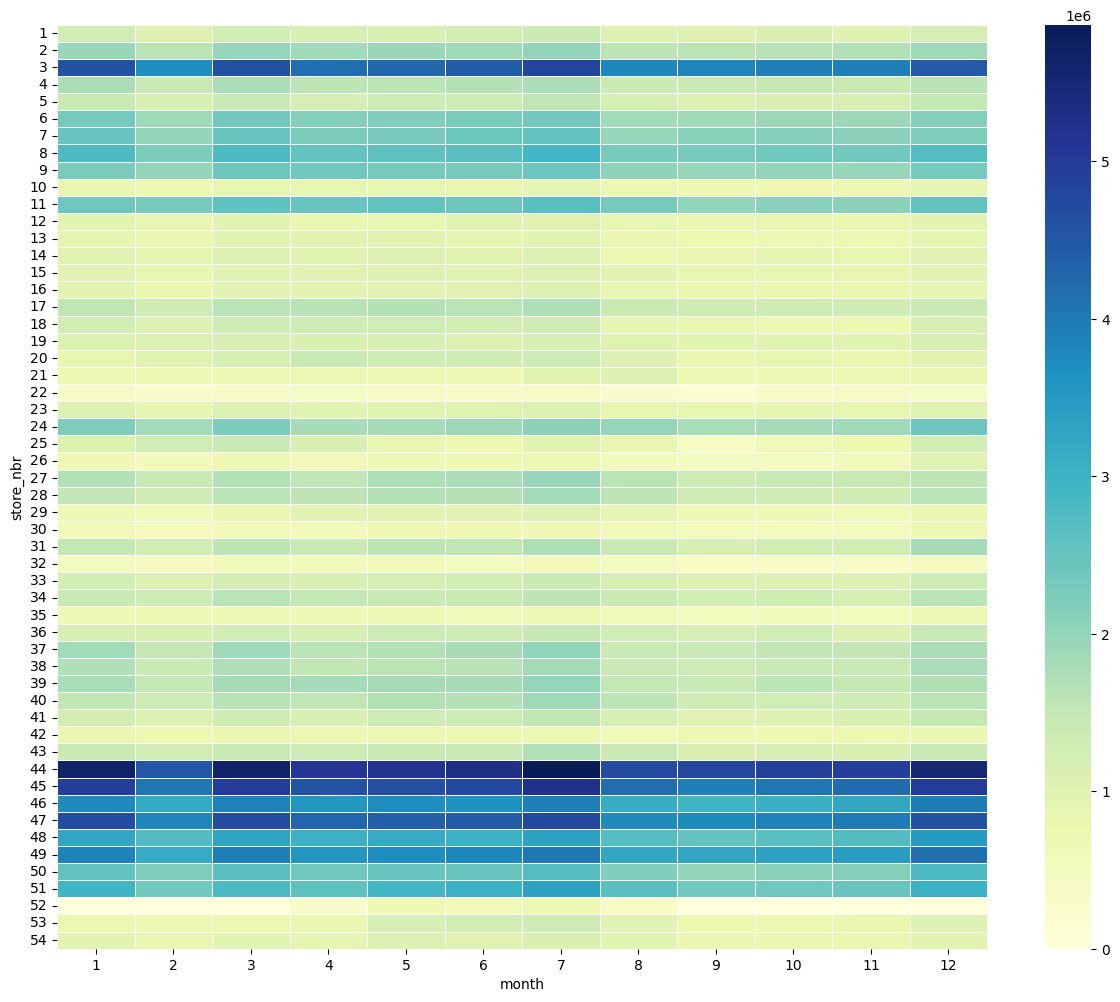

In [13]:
# 店舗別・月別の売上
table = pd.pivot_table(train_df, values ='sales', index =['store_nbr'],
                         columns =['month'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(15,12))         
sns.heatmap(table, annot=False, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

C:\Users\nakamura\AppData\Local\Temp\ipykernel_17624\3375436013.py:2: FutureWarning:

The provided callable <function sum at 0x000001FF3D383380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



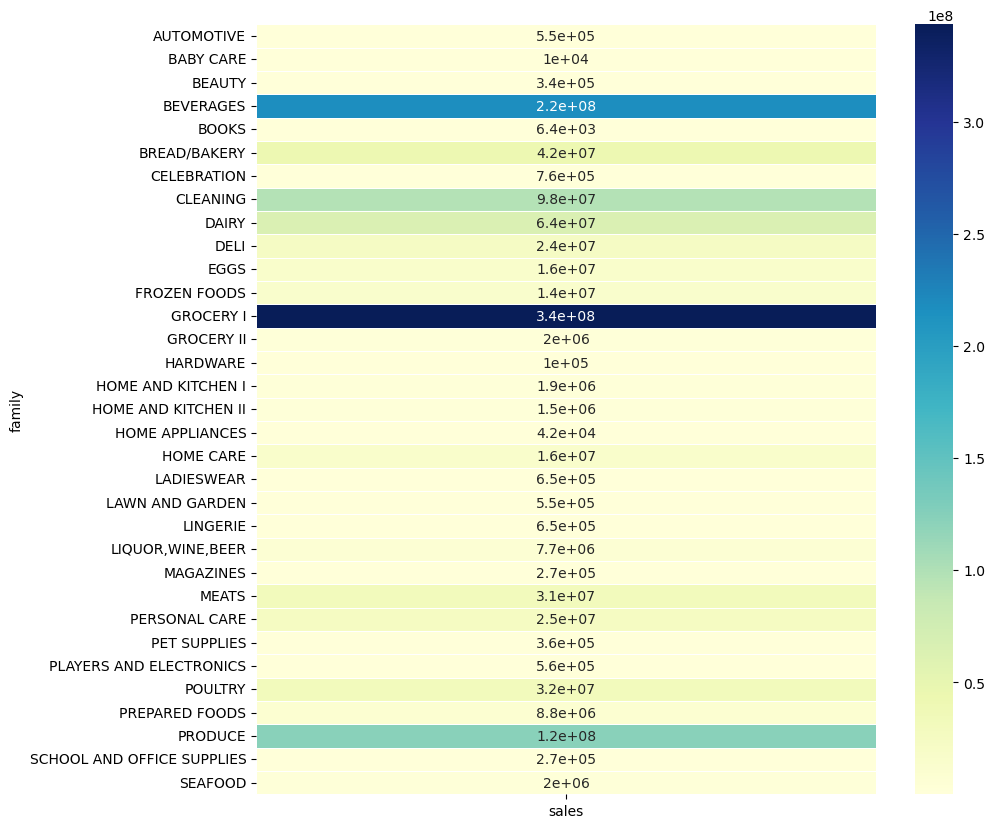

In [14]:
# 商品の種類別の売り上げ
table1 = pd.pivot_table(train_df, values ='sales', index =['family'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table1, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

In [15]:
total_sum = table1.sales.sum()
table1/total_sum

,sales
family,
AUTOMOTIVE,0.000517
BABY CARE,0.000009
BEAUTY,0.000315
BEVERAGES,0.202073
BOOKS,0.000006
BREAD/BAKERY,0.039244
CELEBRATION,0.000709
CLEANING,0.090832
DAIRY,0.060064
